# Configuring the generator

In [1]:
from pt_mri.generator.Agilent33500B import Agilent33500B

In [2]:
generator=Agilent33500B("192.168.1.2", 5025)

In [3]:
generator.set_output(True,1)
generator.set_pulse_mode(1)
generator.set_frequency(1,100E3)
generator.set_voltage_high(1,3)
generator.set_voltage_low(1,0)
generator.set_pulse_width(1,1/100E3*20/100)

In [4]:
generator.set_output(True,2)
generator.set_pulse_mode(2)
generator.set_frequency(2,200E3)
generator.set_voltage_high(2,3)
generator.set_voltage_low(2,0)
generator.set_pulse_width(2,1/100E3*20/100)

# Configuring the picoscope

In [1]:
from pt_mri.pico.Picoscope import Picoscope
from pt_mri.pico.ChannelConfig import ChannelConfig
import matplotlib.pyplot as plt

In [2]:
channel_configs=[]
channel_configs.append(ChannelConfig("A"))
channel_configs.append(ChannelConfig("B", enabled=True))
channel_configs.append(ChannelConfig("C", enabled=False))
channel_configs.append(ChannelConfig("D", enabled=False))

pico=Picoscope()
pico.connect(1E7, 1000, channel_configs)

Warning, frequency not exactly what was requested. 10000000.0!=10416666.666666666


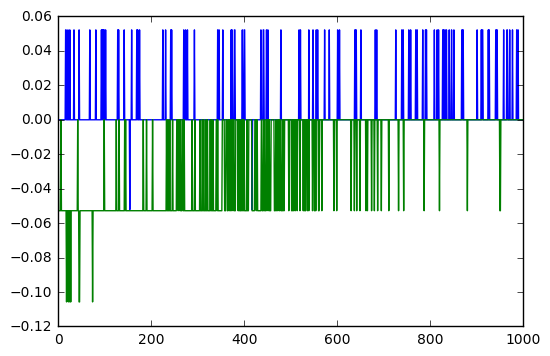

In [3]:
traces=pico.get_traces(channel_configs[0],0.0)
[plt.plot(trace) for trace in traces]
plt.show()

# Closing everything properly

In [4]:
if 'pico' in locals(): pico.disconnect()
if 'generator' in locals(): generator.close()